# Lesson 18b - Support Vector Machines

### Additional Resources
* Hands-On Machine Learning, Ch 5

we accomplish two objectives here:
1.  we study the effect of regularization parameter C and the degree parameter   d on the performace of the SVM algorithm

2.  we study the SVM syntax


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_gaussian_quantiles, make_moons, make_circles, make_classification

from ClassificationPlotter import plot_regions
from ipywidgets import *

## Example 1

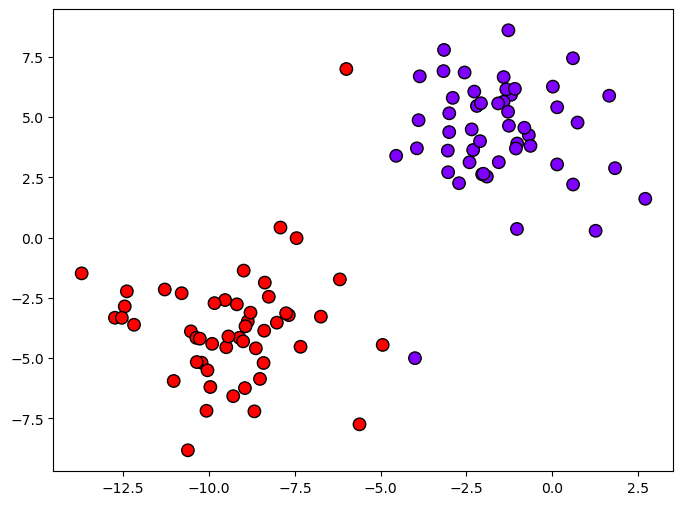

In [2]:
np.random.seed(1)
X1, y1 = make_blobs(n_samples=100, centers=2, cluster_std=2)
#below we change two points in X1 data
X1[0,:] = [-4, -5]     #this happens to be a BLUE point
X1[1,:] = [-6, 7]         #this happens to be a RED point

plt.figure(figsize = [8,6])
plt.scatter(X1[:, 0], X1[:, 1],  c=y1, s=80, edgecolor='k', cmap='rainbow')
plt.show()

## Scikit-Learn Syntax

In [5]:
#think about the SVM as teh algorithm making the WIDEST possible street between the classes.
#this is called "LARGE MARGIN CLASSIFICATION".
# in this code chunk change the value of the regularization parameter C
#note that making C SMALLER makes the street margins wider.   It also changes the direction of the "street".

#note that with C=5.00 we get the PERFECT classification but with the very NARROW margins.  
#This classification will probably misclassify many instances in the validation data set...

#note that with C=0.01 we get only .98 ACCURACY (2 out of 100 points are misclassified)
#but the margins are WIDE.   This classification will probably work better on the validation data set...

%run -i Snippets/snippet10.py

## Scikit-Learn Syntax

C:    float, default=1.0.   
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel:   {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’.  
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degree:   int, default=3.  
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma:   {‘scale’, ‘auto’} or float, default=’scale’.  
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
if ‘auto’, uses 1 / n_features.

Training Accuracy: 0.98


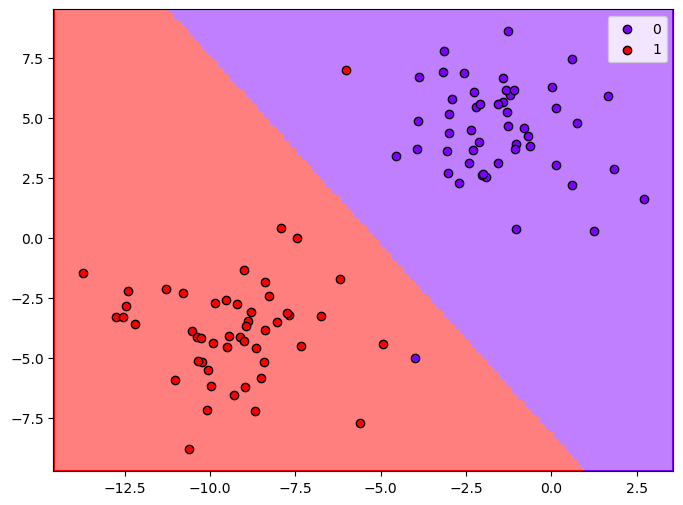

In [6]:
#we use a LINEAR SVC in this code.  So the street will be STRAIGHT. 
#here we recreate the plot above using the SVC function below.
mod_01 = SVC(kernel='linear', C=0.01)

mod_01.fit(X1, y1)
print('Training Accuracy:', mod_01.score(X1, y1))

plot_regions(mod_01, X1, y1, fig_size=[8,6], num_ticks=200)

## Example 2

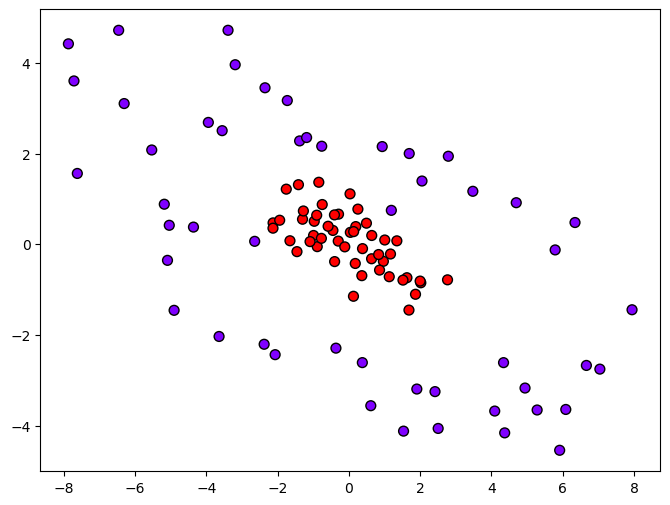

In [7]:
np.random.seed(3158)
X2_temp, y2 = make_circles(n_samples=100, noise=0.2, factor=0.05)
X2 = np.array([2 * X2_temp[:,0] + 6 * X2_temp[:,1], 
               2 * X2_temp[:,0] - 3 * X2_temp[:,1]]).T

plt.figure(figsize = [8,6])
plt.scatter(X2[:,0], X2[:,1], c=y2, s=50, edgecolor='k', cmap='rainbow')
plt.show()

In [9]:
#caution:    snippet11.py  uses  make_circles(n_samples=100, noise=0.2, factor=0.05)
#so the data is exactly what it is in the plot above.
# it also uses 
#  degree of the 
%run -i Snippets/snippet11.py

Training Accuracy: 1.0


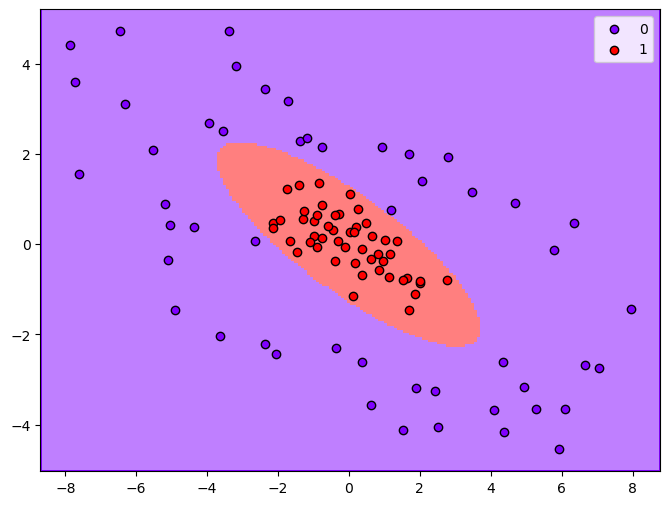

In [10]:
#now we want to see how this is done using the SVC function
#we use the POLYNOMIAL SVC with D=2.  Note the regularization parameter C=20.
mod_02 = SVC(kernel='poly', degree=2, C=20, gamma='auto')
mod_02.fit(X2, y2)
print('Training Accuracy:', mod_02.score(X2, y2))
plot_regions(mod_02, X2, y2, fig_size=[8,6], num_ticks=200)

## Example 3

8421


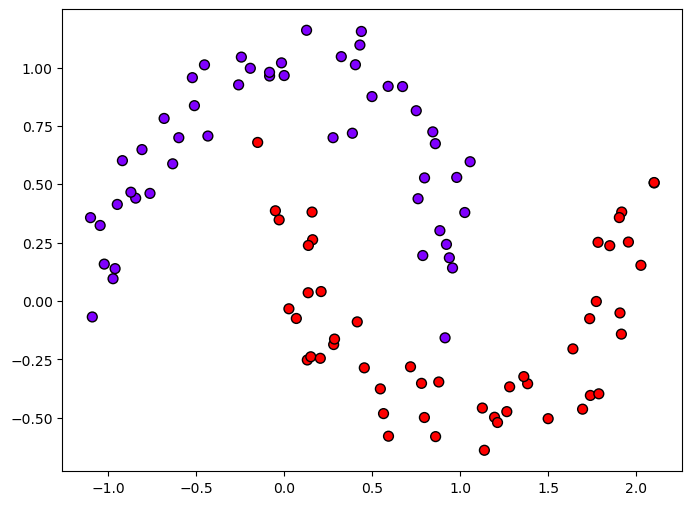

In [11]:
sd = np.random.choice(range(9999))
print(sd)
np.random.seed(159)
X3, y3 = make_moons(n_samples=100, noise=0.1)

plt.figure(figsize = [8,6])
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=y3, s=50, edgecolor='k', cmap='rainbow')
plt.show()

In [12]:
%run -i Snippets/snippet12.py

## Scikit-Learn Syntax

Training Accuracy: 0.94


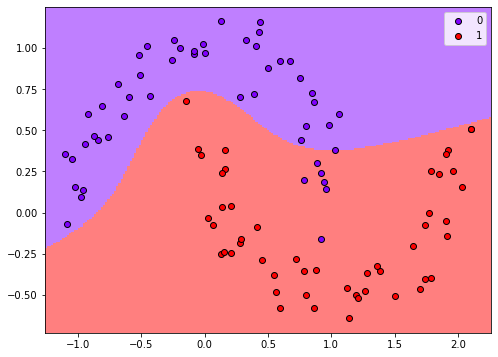

In [40]:
#Let's try D=3, C=10
mod_03 = SVC(kernel='poly', degree=3, C=10, gamma='auto')
mod_03.fit(X3, y3)
print('Training Accuracy:', mod_03.score(X3, y3))
plot_regions(mod_03, X3, y3, fig_size=[8,6], num_ticks=200)